## Detect Circles in SAX view echo images 

- It seems that SAX views have structures with circular shapes. 
- Goal: Automatically detect circles in SAX view images using HoughCircle approach. These circles will be used as labels to train a HED neural network to find the contours of the LV.
- Note 1: Hogh circles are used as labels to train a HED network in Step 2 of SAX segmentation methodology. 
- Note 2: Sometimes the Hough circle method fails to find the LV in the image. This happens mainly for two reasons: 1. poor image quality. 2. the method confuses the circular shape found in both RV and LV, and sometimes it shifts over the RV. Notice, however, that despite this, the method is able to detect the region of interest (endocardium and pericardium areas) in the image.

In [1]:
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

from utils import util_seg

2024-08-13 22:58:09.732949: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2024-08-13 22:58:09.733026: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2024-08-13 22:58:09.733032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## Detect circles in SAX view using HoughCircles. 


In [3]:
def step2_visualization(base_to_dicom, plot=True, save=False):
    """
    Visualizes the images in the given directory using the Hough Circle Transform.
    Parameters:
    - base_to_dicom (str): The path to the directory containing the images.
    - plot (bool, optional): Whether to display the images. Defaults to True.
    - save (bool, optional): Whether to save the images. Defaults to False.
    """


    filenames = glob.iglob(os.path.join(base_to_dicom, '*.npy'))

    for i in range(10):

        filename = filenames.__next__()
        
        img_fov = np.load(filename)

        img_filtered, img_circle = util_seg.detect_circles(util_seg.get_mask_convex(img_fov[...,0]),minDist=400, minRadius=30, maxRadius=100)

        ## Visualize images
        fig, ax_arr = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(30, 20))

        ax1, ax2, ax3, ax4 = ax_arr.ravel()

        ax1.imshow(img_fov[...,0], cmap='gray')
        ax1.set_title(f'Original img',fontsize=20)
        ax1.set_ylabel(os.path.basename(filename),fontsize=20)

        ax2.imshow(img_filtered, cmap="gray")
        ax2.set_title(f'Filtered img',fontsize=20)

        ax3.imshow((img_fov[...,0]) * (1-img_circle[...,1]/255), cmap="gray")
        ax3.set_title(f'Original + HoughCircle',fontsize=20)

        ax4.imshow(img_circle[...,1], cmap="gray")
        ax4.set_title(f'HoughCircle',fontsize=20)

        if plot:
            plt.show()


## Visualize examples

1 circles detected.


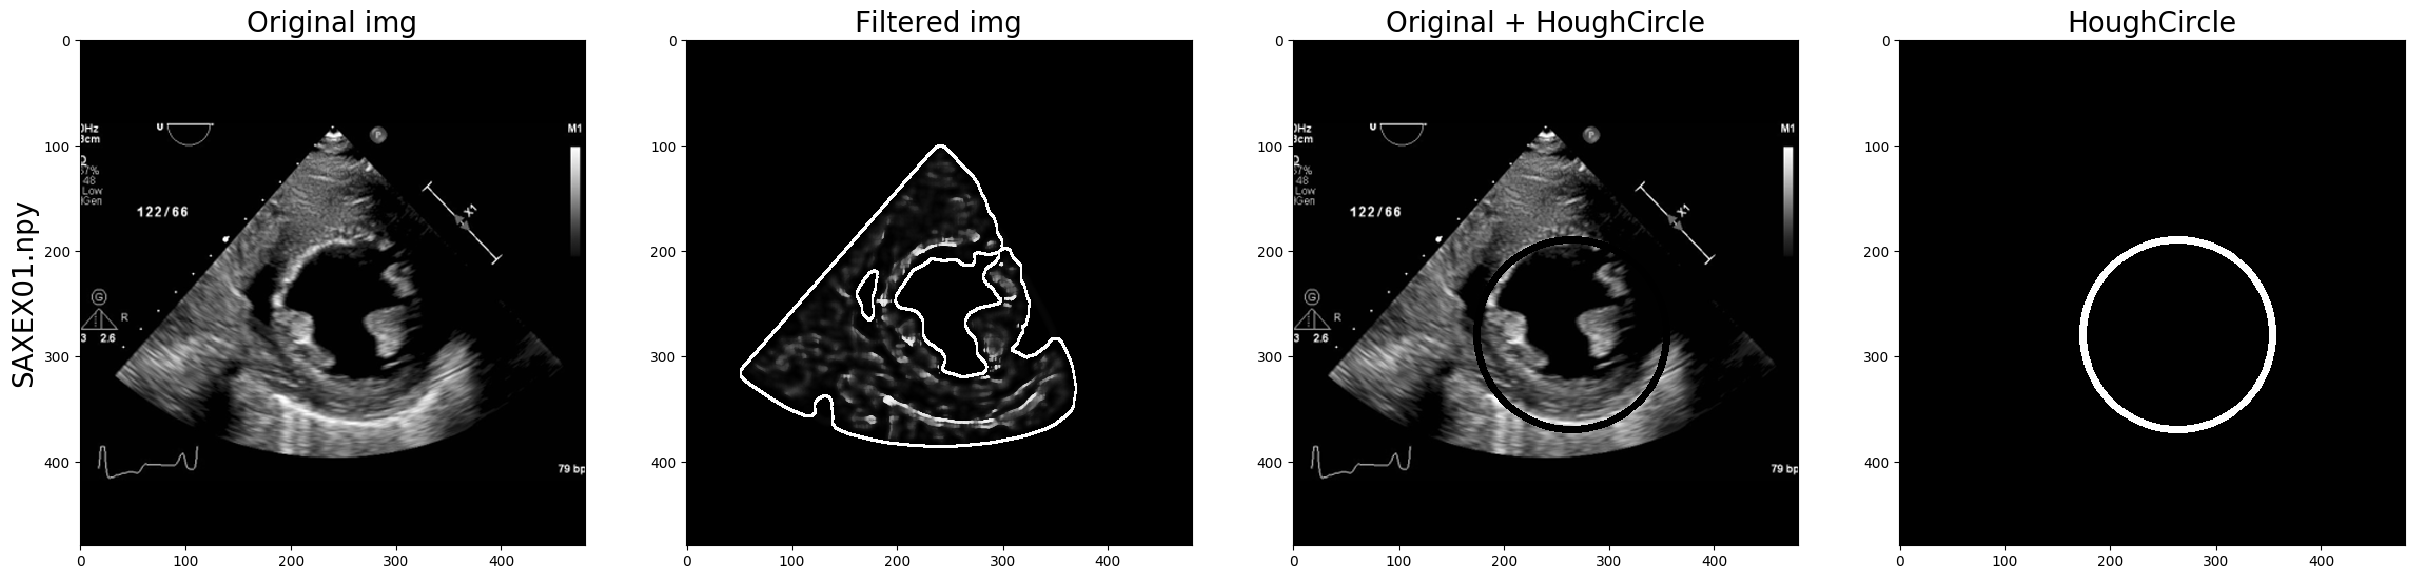

1 circles detected.


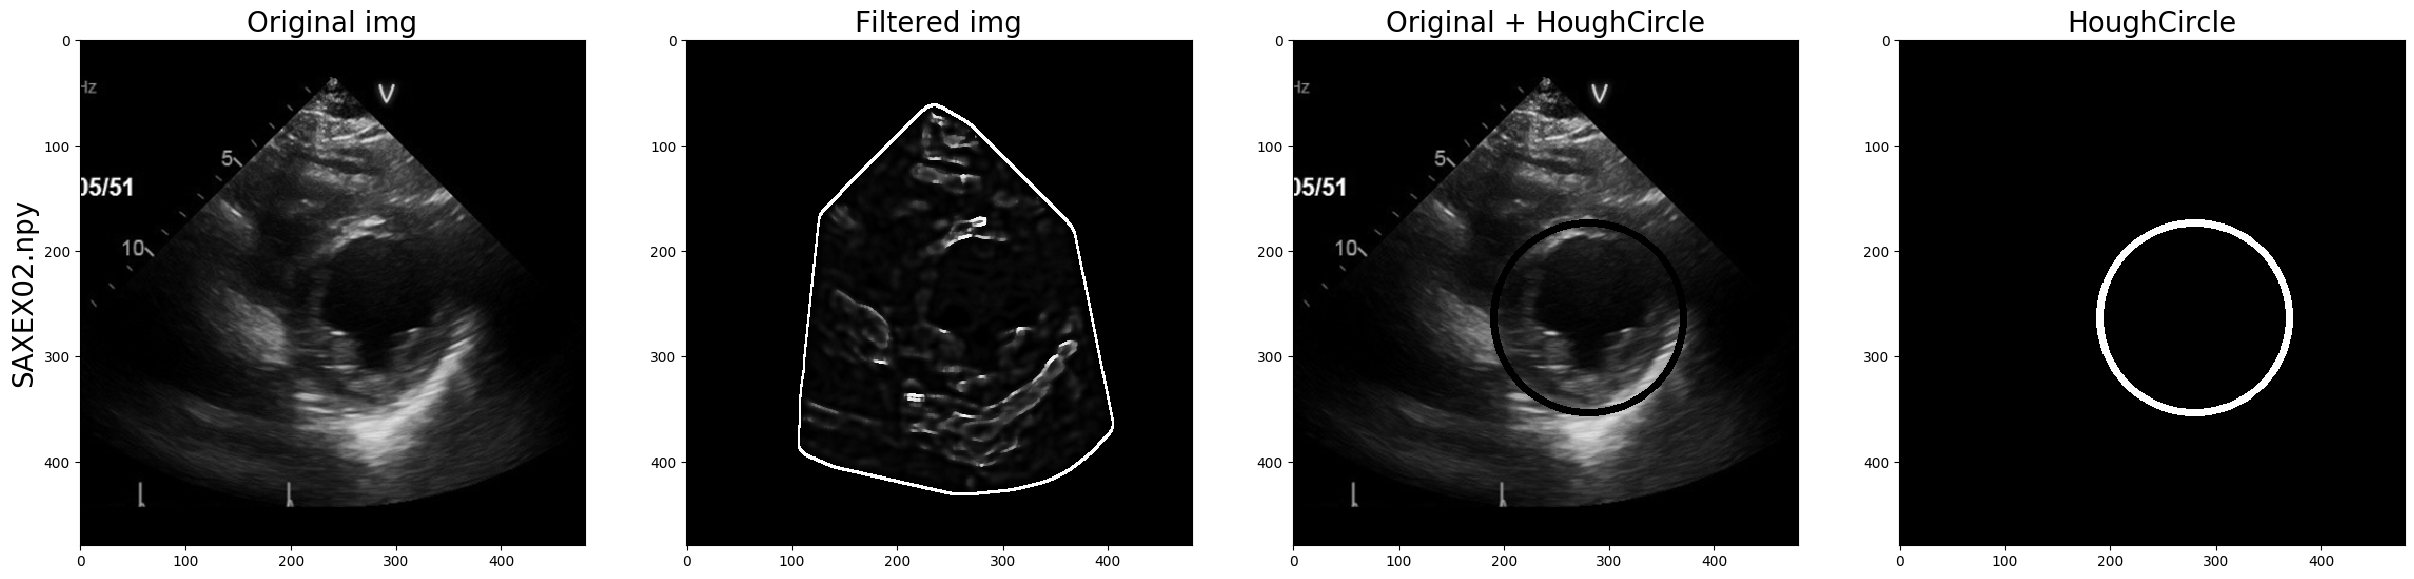

1 circles detected.


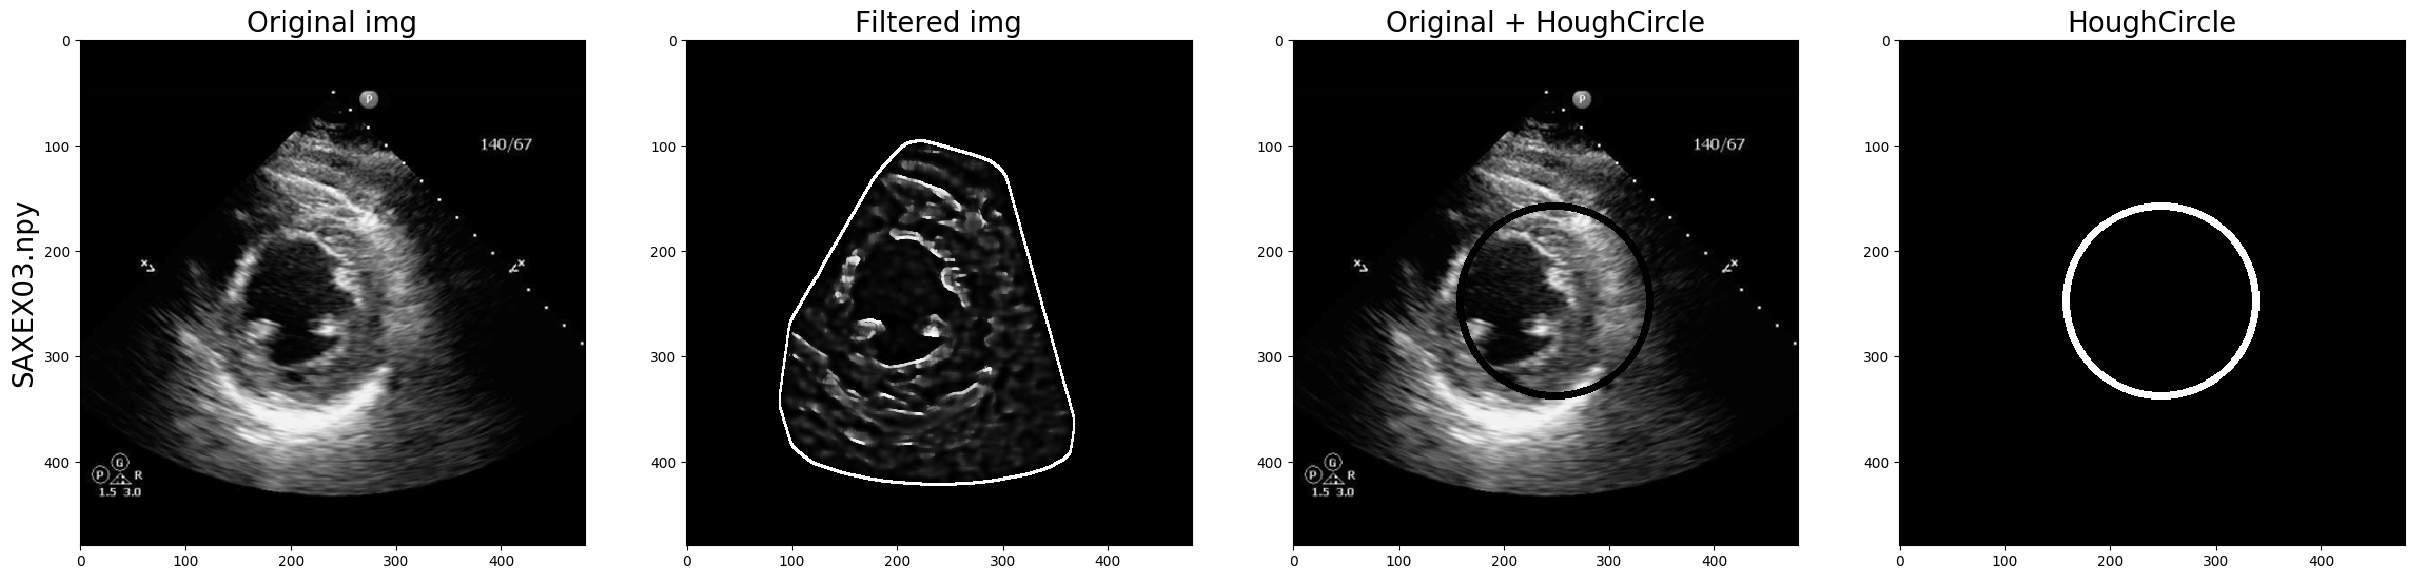

1 circles detected.


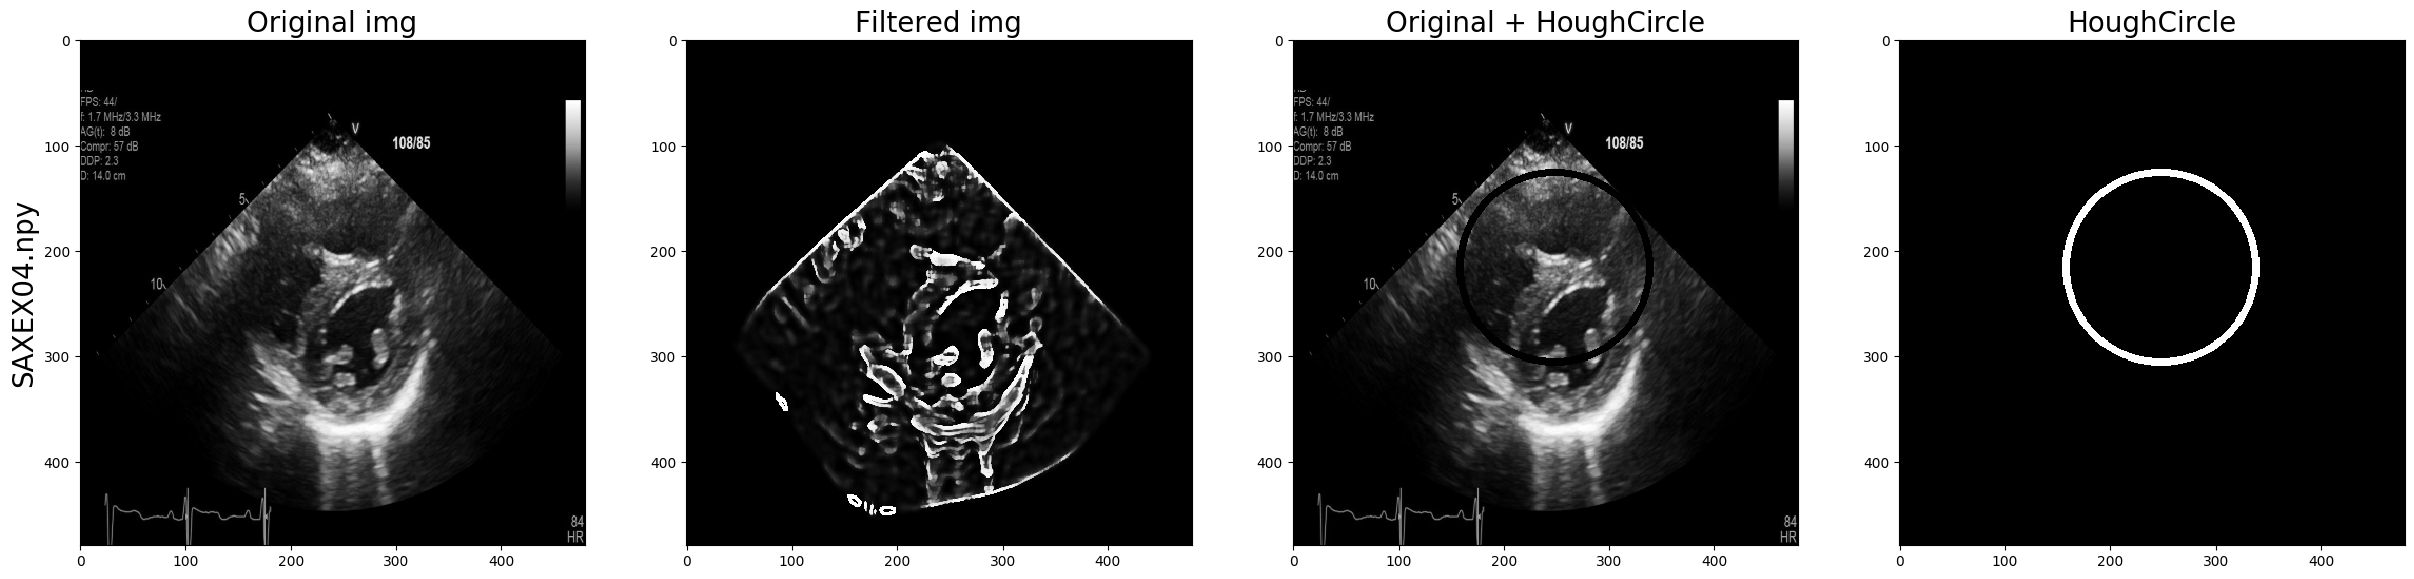

1 circles detected.


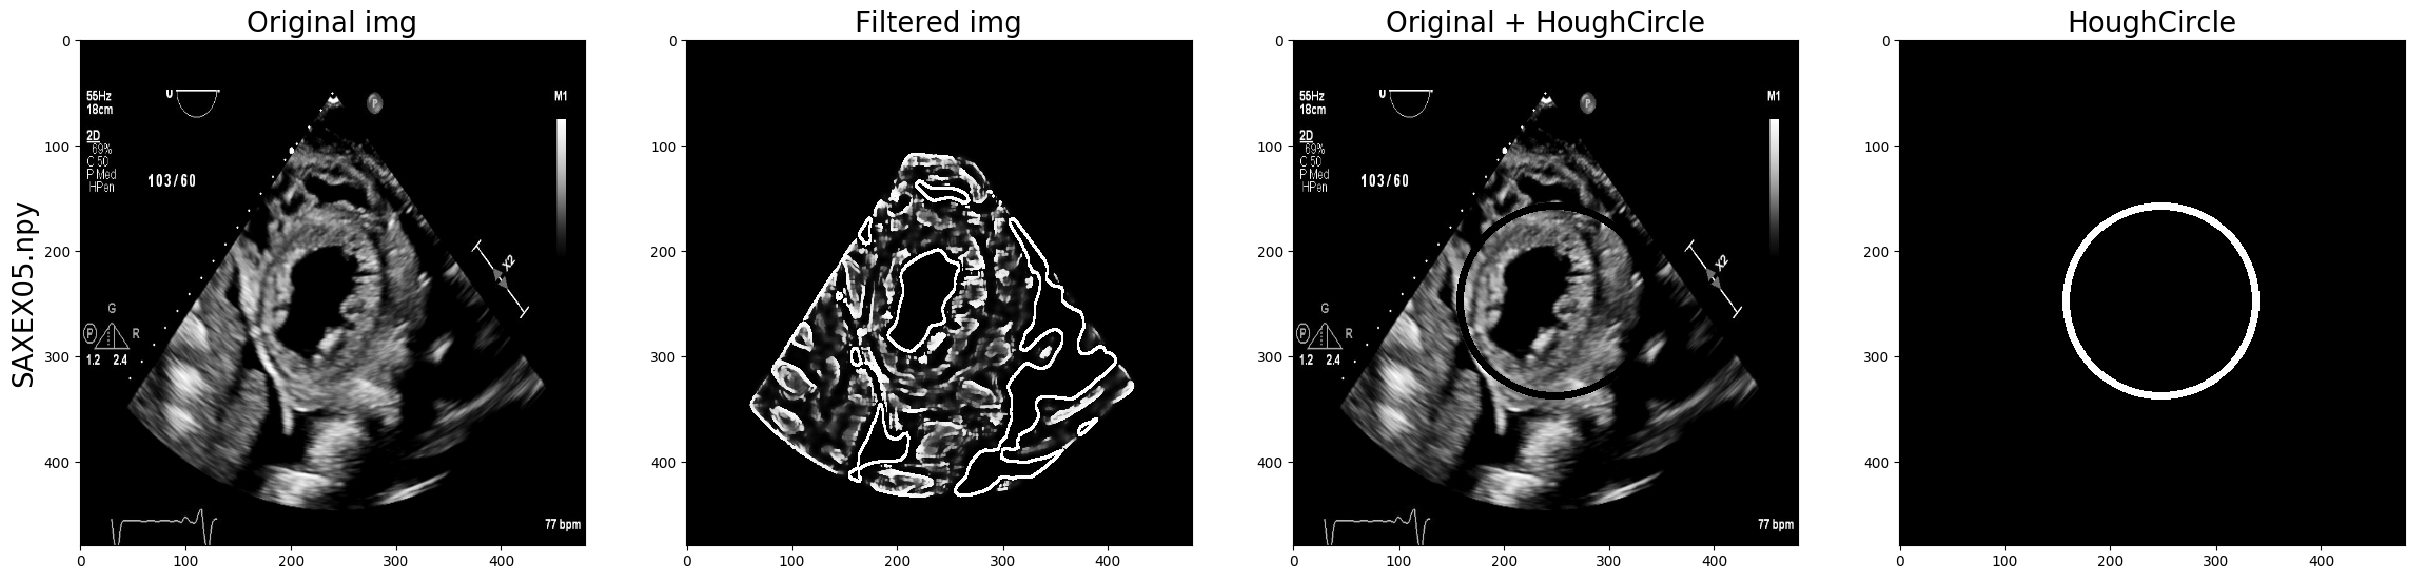

1 circles detected.


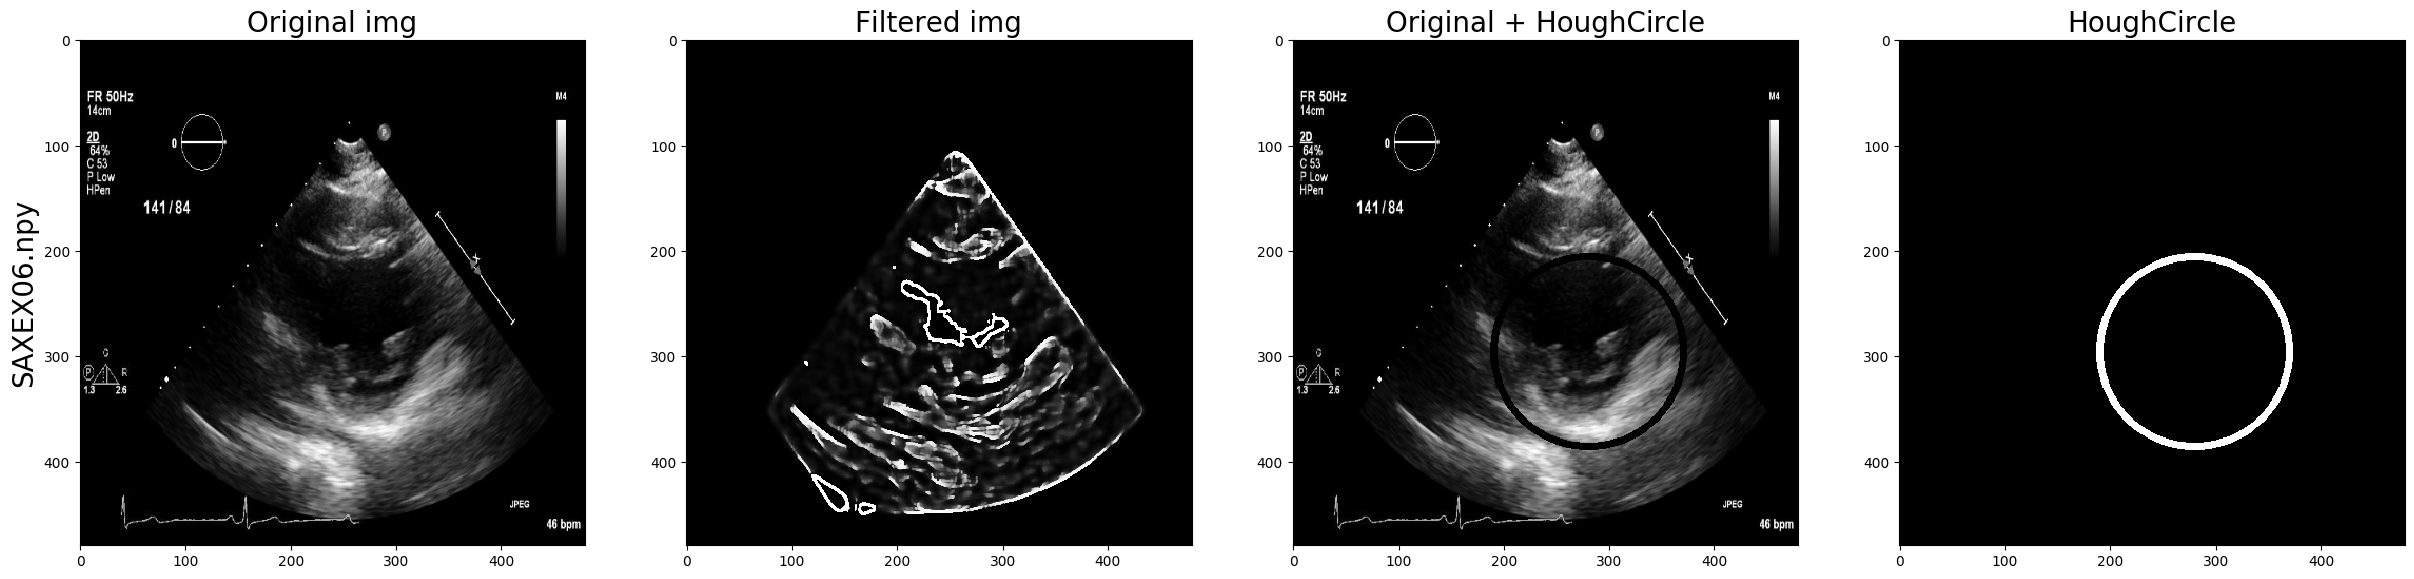

1 circles detected.


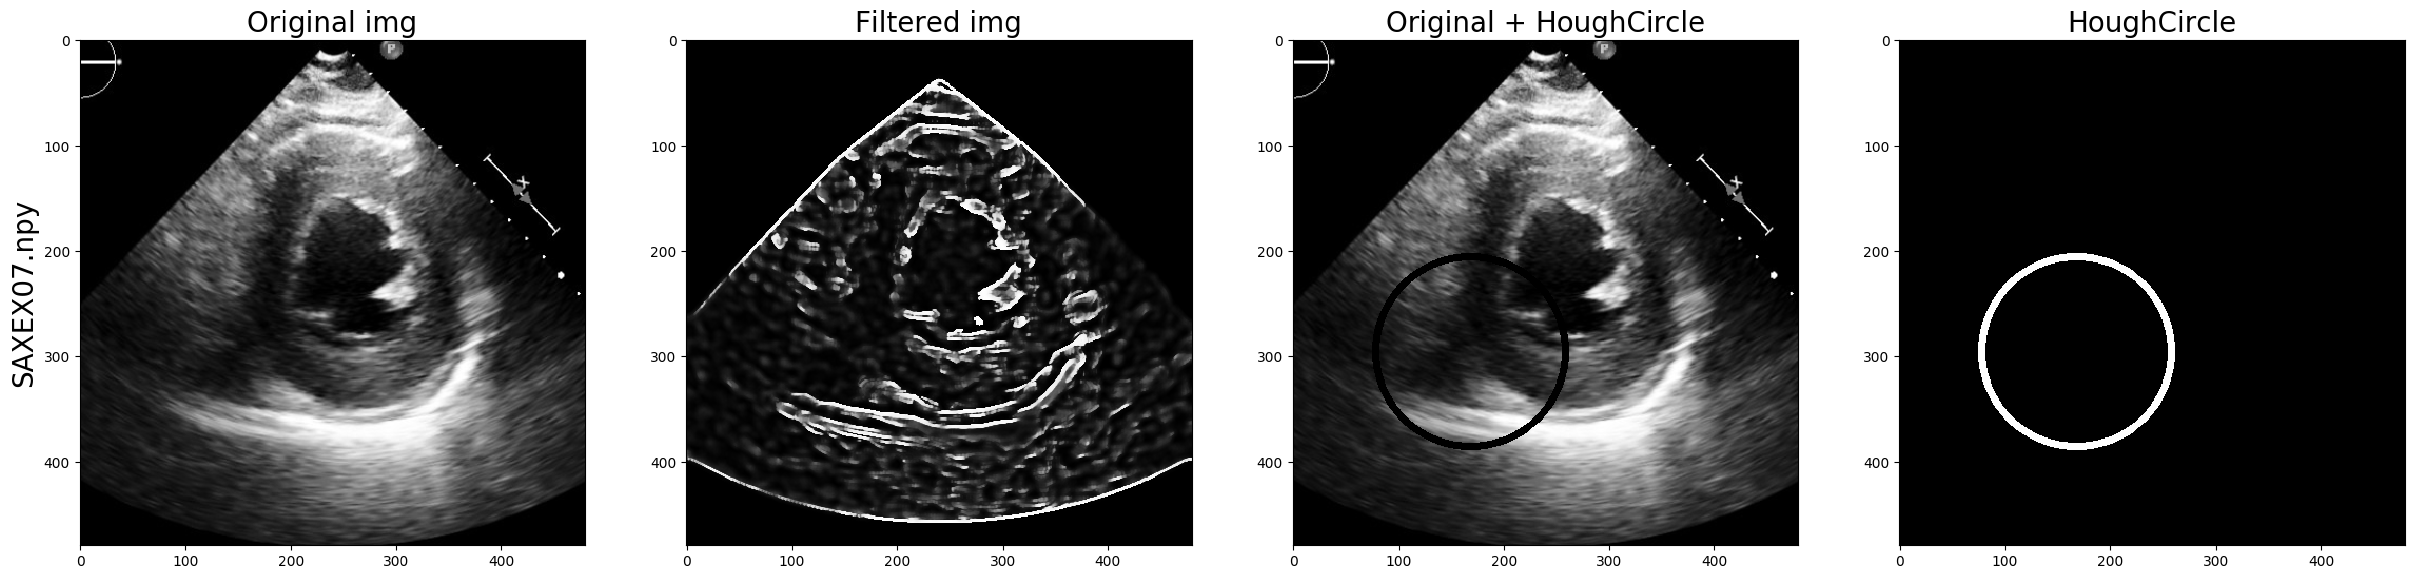

1 circles detected.


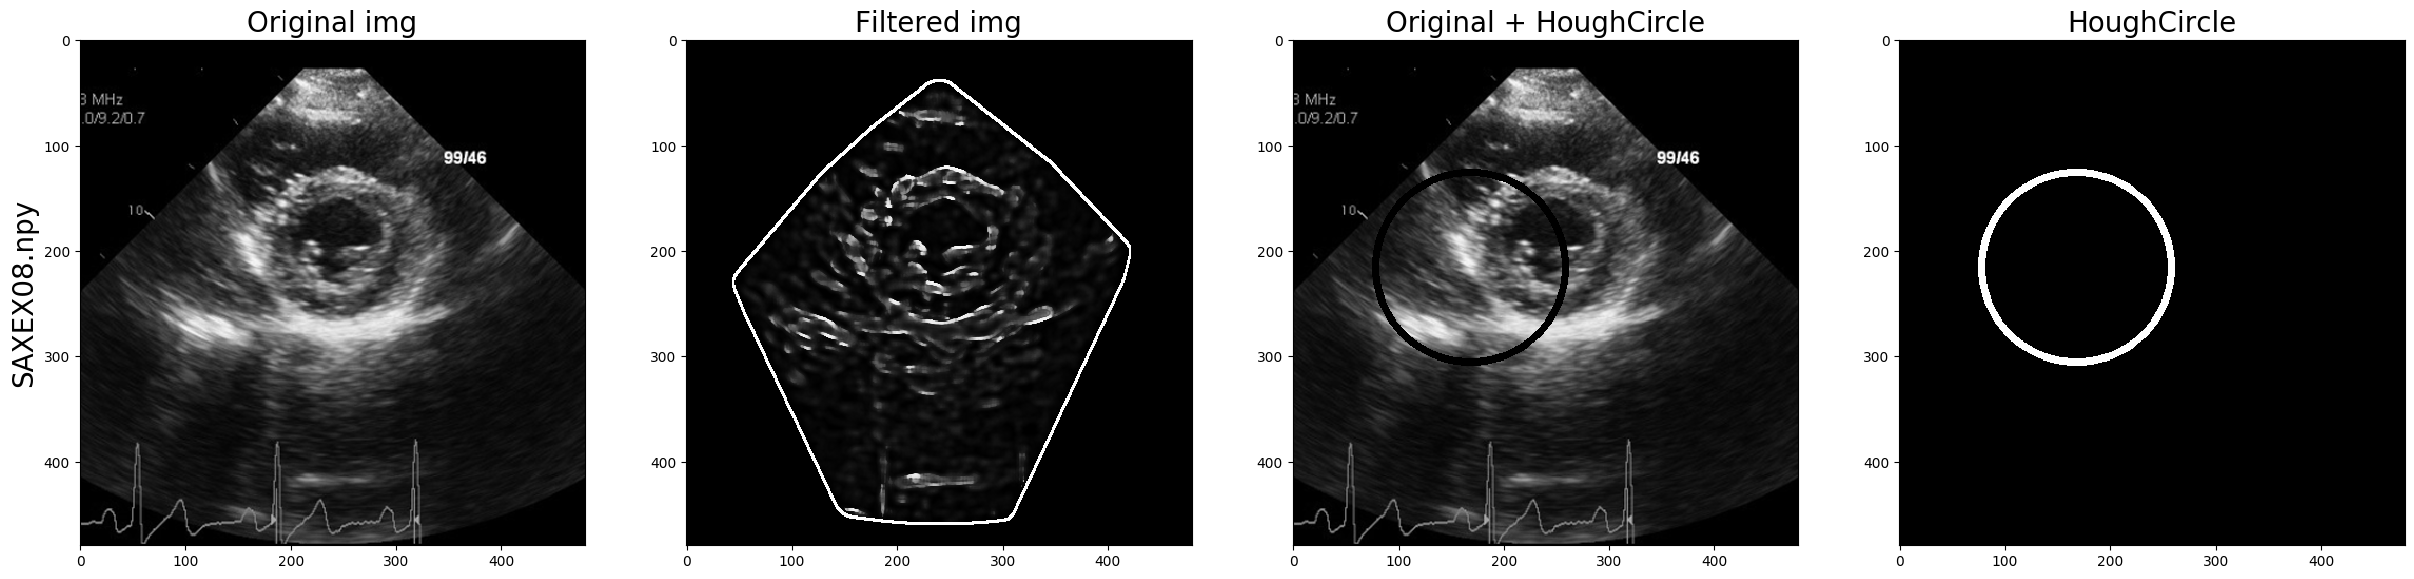

1 circles detected.


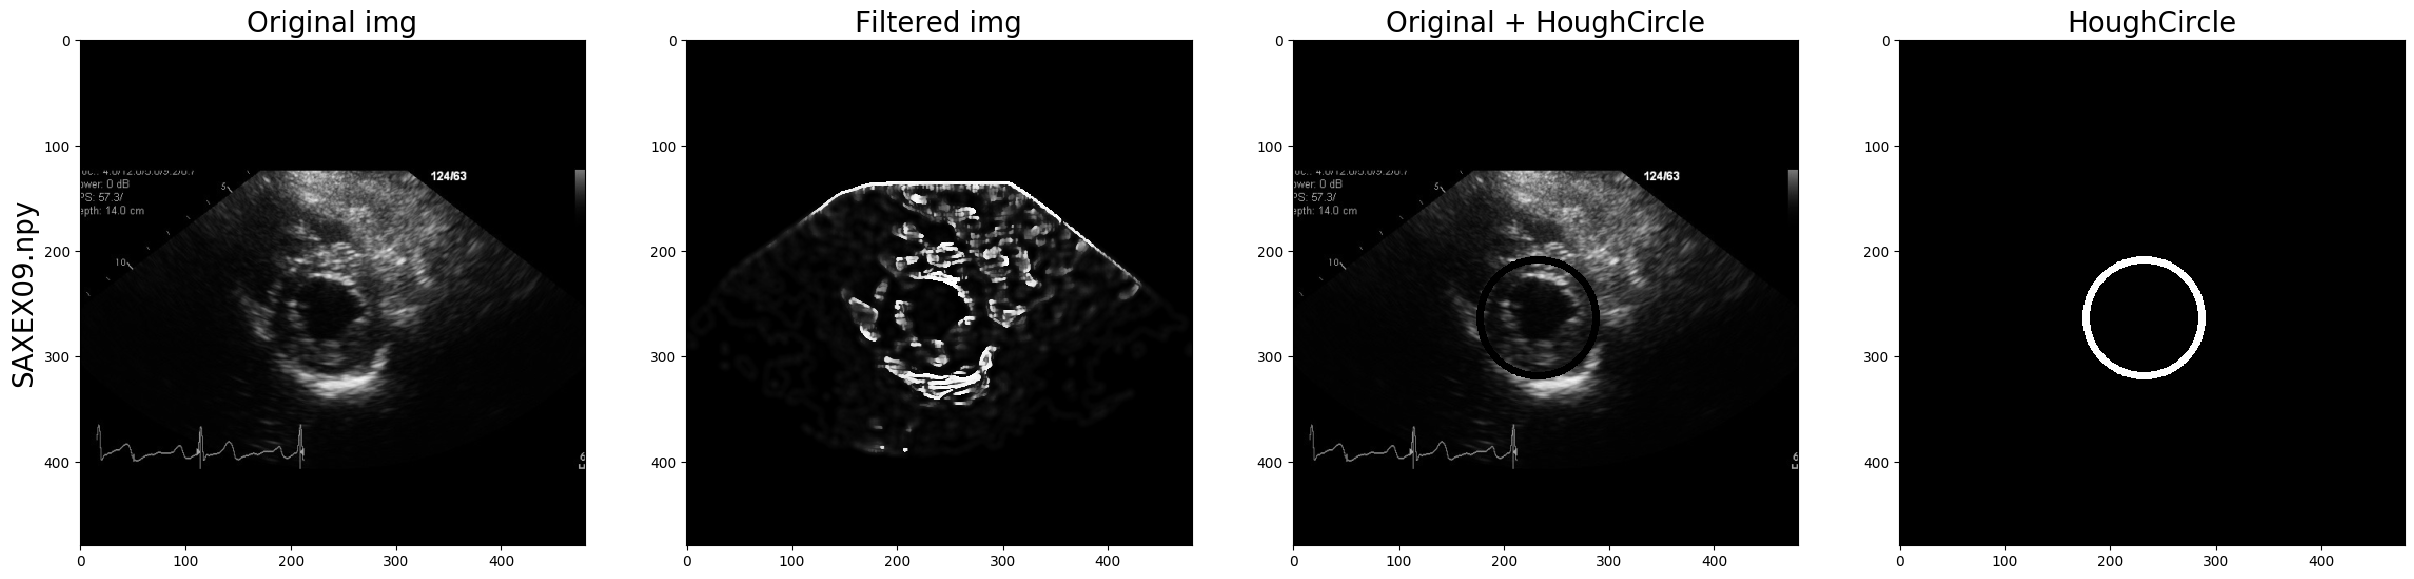

1 circles detected.


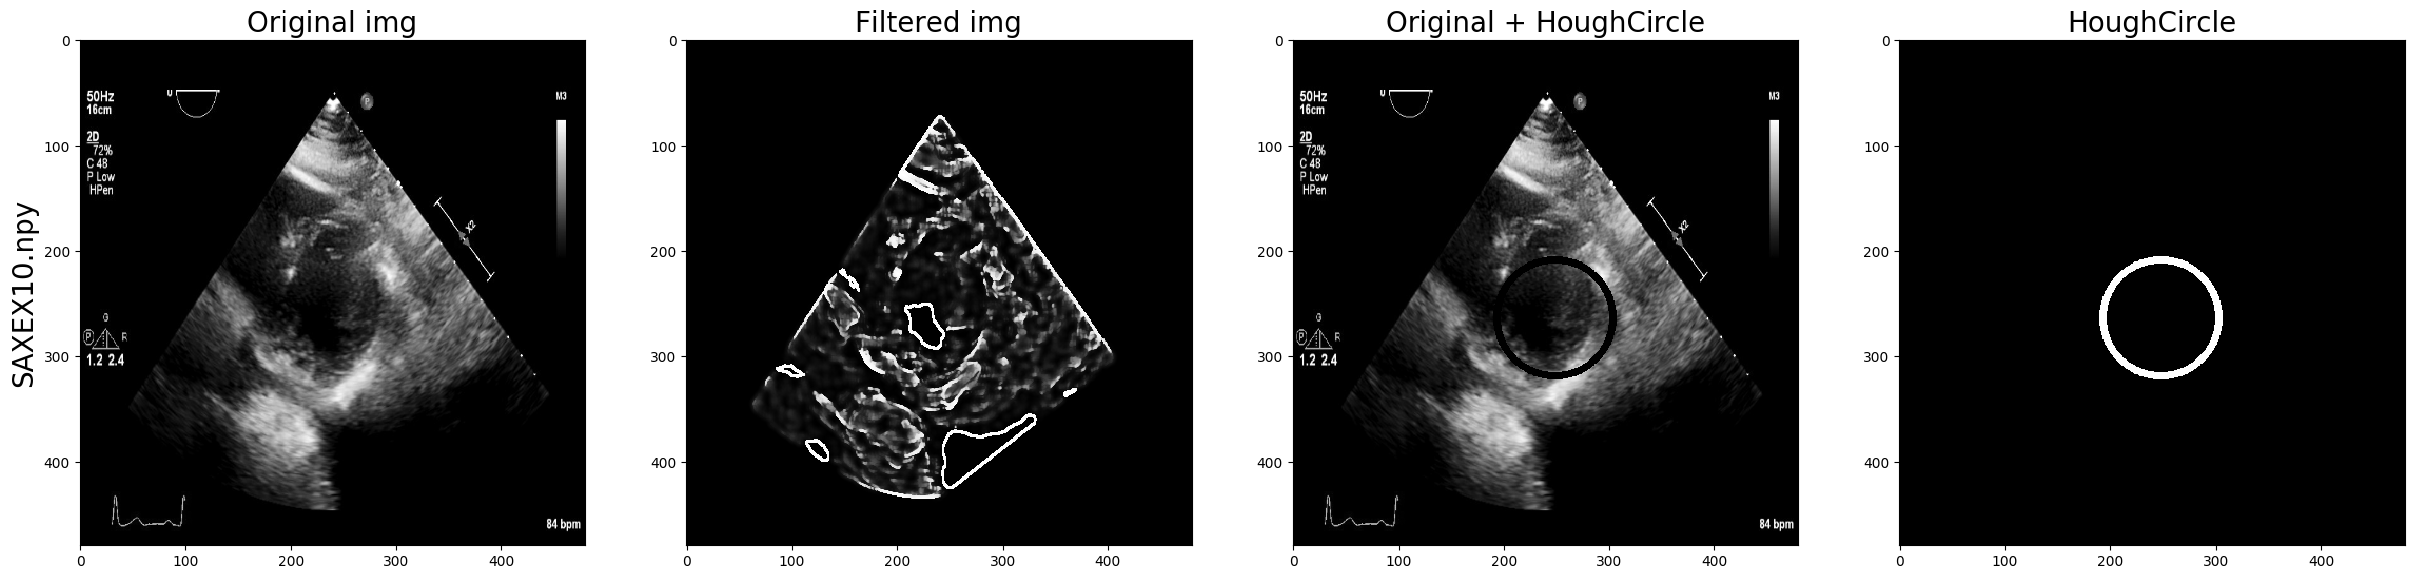

In [4]:
indir = "example_data/SAX/sax_images/"
step2_visualization(indir, plot=True)